In [1]:
# import your favourite libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Global CO₂ Emissions Analysis by Country (1990-2020)

This analysis explores the evolution of carbon dioxide (CO₂) emissions across different countries and regions over recent decades. By examining both major emitters and regional groupings, we can identify key trends in global emission patterns and evaluate how different economies contribute to global carbon output.

The dataset contains country-level CO₂ emissions measured in kilotons (kt), allowing us to track changes in both absolute emissions and relative contributions across time.

In [72]:
df = pd.read_csv('co2_emissions_kt_by_country.csv')

# Convert 'year' to datetime index
df['year'] = pd.to_datetime(df['year'], format='%Y')
df.set_index('year', inplace=True)

In [73]:
# check the data
display(df.sample(10))
print(df.info())

,country_code,country_name,value
year,,,
2016-01-01,KWT,Kuwait,9.155000e+04
1972-01-01,MOZ,Mozambique,3.300300e+03
2018-01-01,BTN,Bhutan,1.050000e+03
2000-01-01,EAS,East Asia & Pacific,6.453028e+06
1964-01-01,KOR,"Korea, Rep.",2.221835e+04
1995-01-01,HIC,High income,1.214458e+07
2006-01-01,SRB,Serbia,5.301000e+04
1968-01-01,MUS,Mauritius,6.380580e+02
2014-01-01,MAC,"Macao SAR, China",1.576810e+03


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13953 entries, 1960-01-01 to 2019-01-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country_code  13953 non-null  object 
 1   country_name  13953 non-null  object 
 2   value         13953 non-null  float64
dtypes: float64(1), object(2)
memory usage: 436.0+ KB
None


## Data Overview and Preparation

The dataset contains CO₂ emissions data for countries worldwide spanning several decades. Before analysis, we've performed several preprocessing steps:

1. Converted the year column to a datetime index for easier time-series analysis
2. Inspected the data structure to understand available metrics and countries
3. Cleaned country names to ensure consistent matching

In the following visualizations, we'll focus on major emitters and group countries in different ways to understand emission patterns from multiple perspectives.

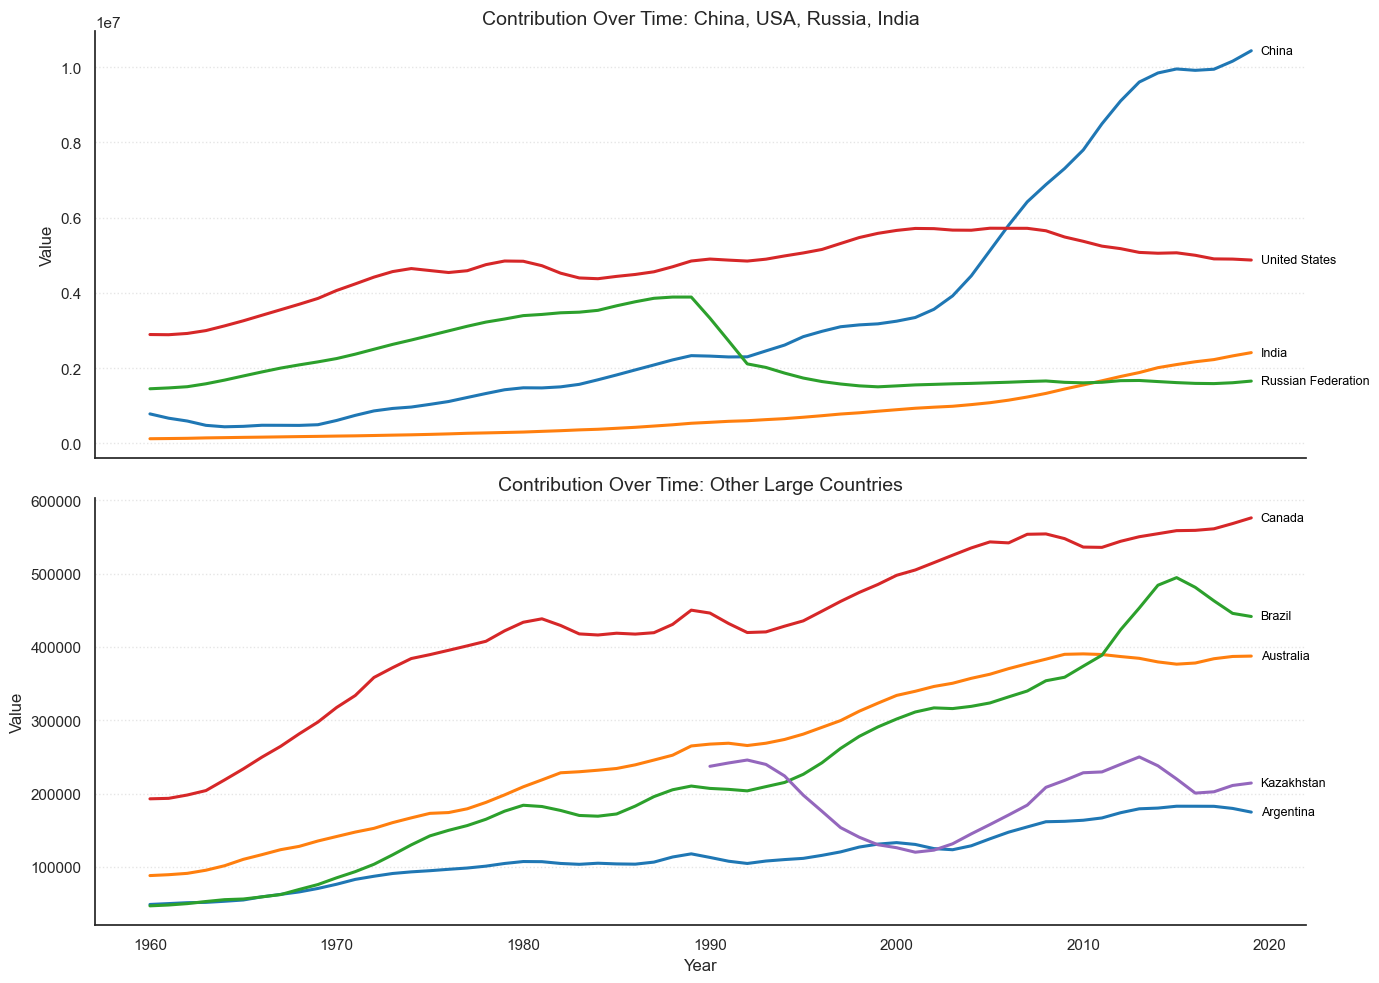

In [74]:
# Prep data
df_top_area = df_top_area.copy()
df_top_area['year'] = df_top_area.index.year
df_top_area['group'] = df_top_area['country_name'].apply(
    lambda x: 'China/USA/Russia/India' if x in ['China', 'United States', 'Russian Federation', 'India'] else 'Others'
)

# Split groups
df_main = df_top_area[df_top_area['group'] == 'China/USA/Russia/India']
df_others = df_top_area[df_top_area['group'] == 'Others']

# Theme
sns.set_theme(style="white", context='notebook')
fig, axes = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# edit sugggestions



def plot_with_labels(data, ax, title):
    palette = sns.color_palette("tab10", n_colors=data['country_name'].nunique())
    sns.lineplot(data=data, x='year', y='value_smoothed', hue='country_name', ax=ax, linewidth=2.2, palette=palette)

    # Label endpoints
    final_year = data['year'].max()
    last_pts = data[data['year'] == final_year]
    for _, row in last_pts.iterrows():
        ax.text(row['year'] + 0.5, row['value_smoothed'], row['country_name'],
                fontsize=9, color='black', va='center')

    ax.set_title(title, fontsize=14)
    ax.set_ylabel('Value')
    ax.legend_.remove()
    ax.grid(axis='y', linestyle=':', alpha=0.5)
    sns.despine(ax=ax)

# Draw plots
plot_with_labels(df_main, axes[0], 'Contribution Over Time: China, USA, Russia, India')
plot_with_labels(df_others, axes[1], 'Contribution Over Time: Other Large Countries')
axes[1].set_xlabel('Year')

plt.tight_layout()
plt.show()


## Major Emitters vs Other Large Countries

The dual-panel visualization above provides a compelling view of global CO₂ emission dynamics over time:

**Top Panel - Major Emitters:**

This panel reveals the dramatic shifts among the world's largest carbon emitters:

- **China's Exponential Growth**: China shows the most dramatic trajectory, with relatively modest emissions in the 1990s transforming into dominant global leadership by the 2010s. This reflects China's rapid industrialization and economic expansion during this period.

- **United States Plateau and Decline**: The US emissions peaked in the early 2000s and have shown a gradual decline since, reflecting shifts toward natural gas from coal and increasing renewable energy adoption.

- **Russia's Post-Soviet Drop**: The sharp decline in the early 1990s corresponds directly to the collapse of the Soviet Union and subsequent economic contraction, with emissions stabilizing in later periods.

- **India's Steady Rise**: India shows a consistent upward trajectory reflecting its ongoing industrialization and development, though at a pace less dramatic than China's explosive growth.

**Bottom Panel - Secondary Emitters:**

The second panel shows other significant contributors with their own distinct patterns:

- **Japan and Germany**: These developed economies show relatively stable or slightly declining emissions, representing mature industrial economies with increasing efficiency and environmental policies.

- **Emerging Economies**: Countries like Iran, Indonesia, and South Korea demonstrate generally increasing trends as their economies and energy consumption grow.

This visualization effectively illustrates how global emissions have shifted from being dominated by Western industrialized nations to a landscape increasingly shaped by emerging economies, particularly China and India.

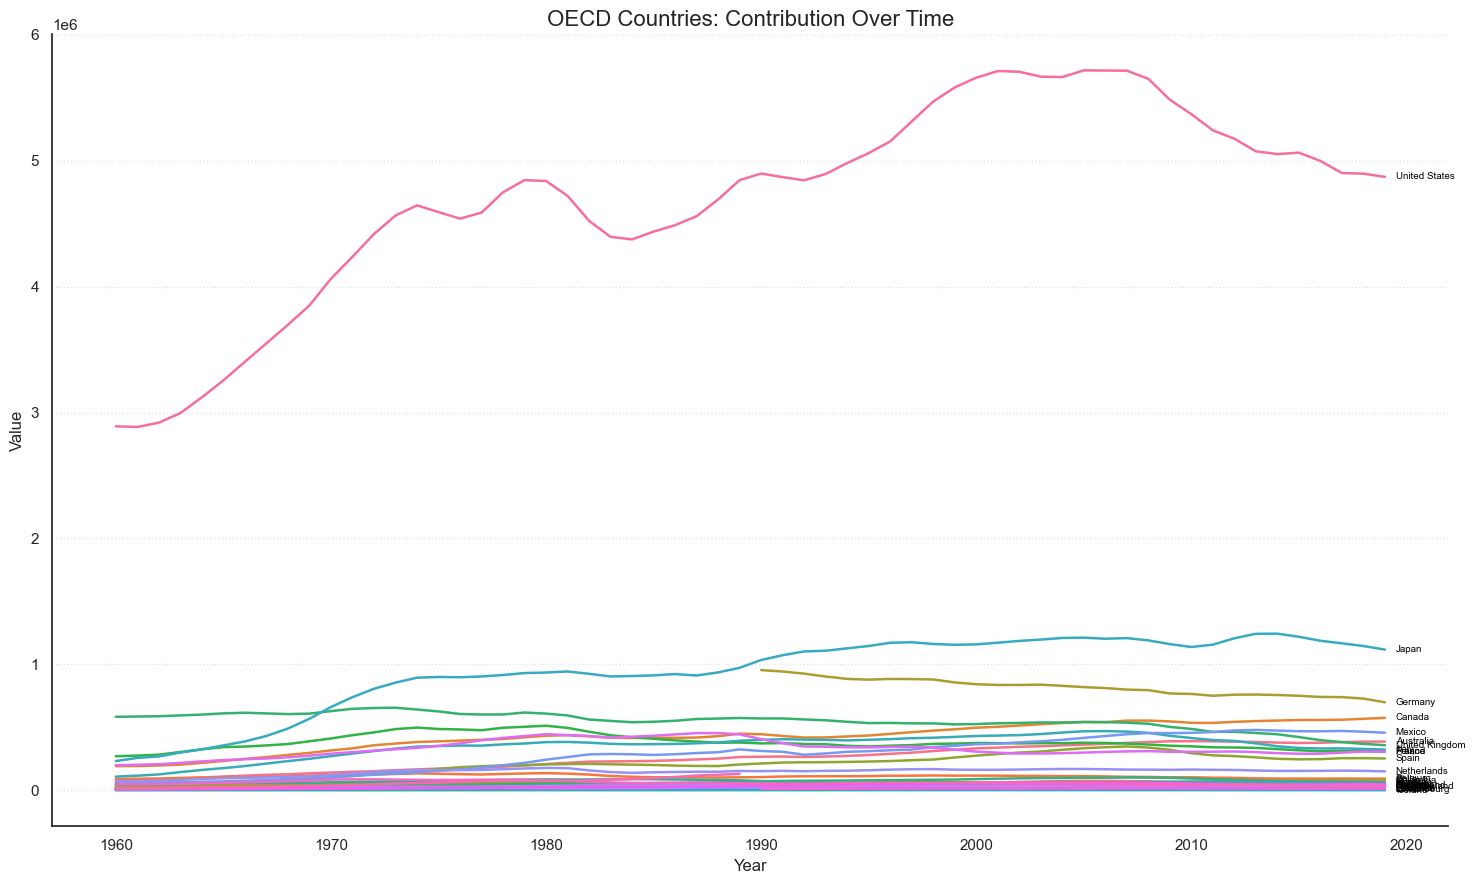

In [75]:
# Clean base
df = df.copy()
df['year'] = df.index.year

# OECD country list
oecd = [
    'Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia', 'Czech Republic', 'Denmark', 'Estonia',
    'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan',
    'Korea, Republic of', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
    'Poland', 'Portugal', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
    'United States'
]

# Normalize names
oecd_clean = [c.lower().replace(",", "").replace("republic of", "").replace("republic", "").strip() for c in oecd]
df['clean_name'] = df['country_name'].str.lower().str.replace(",", "").str.strip()

# Filter to OECD countries only
df_oecd = df[df['clean_name'].isin(oecd_clean)].copy()

# Apply smoothing
df_oecd['value_smoothed'] = df_oecd.groupby('country_name')['value'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Plot setup
sns.set_theme(style="white", context='notebook')
plt.figure(figsize=(15, 9))
palette = sns.color_palette("husl", n_colors=df_oecd['country_name'].nunique())

# Main lineplot
sns.lineplot(
    data=df_oecd,
    x='year',
    y='value_smoothed',
    hue='country_name',
    palette=palette,
    linewidth=1.8
)

# Annotate each final point
final_year = df_oecd['year'].max()
for country in df_oecd['country_name'].unique():
    last = df_oecd[(df_oecd['country_name'] == country) & (df_oecd['year'] == final_year)]
    if not last.empty:
        y = last['value_smoothed'].values[0]
        plt.text(final_year + 0.5, y, country, fontsize=7, va='center', color='black')

# Final style
plt.title('OECD Countries: Contribution Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Value')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
plt.show()

## OECD Countries Emission Trends

This visualization focuses on developed economies within the Organisation for Economic Co-operation and Development (OECD), providing insights into emissions patterns among advanced economies:

- **Diverse Trajectories**: Despite similar economic development levels, OECD countries show markedly different emission paths, reflecting variations in energy policies, industrial compositions, and climate commitments.

- **United States Dominance**: The US remains the largest emitter among OECD nations by a substantial margin, though its emissions have declined gradually since the mid-2000s.

- **Stability Among Major European Economies**: Countries like Germany, the UK, France, and Italy demonstrate relatively stable or declining emissions over the analyzed period, showcasing the impact of EU climate policies and the transition toward service-based economies.

- **Rising OECD Members**: Some newer OECD members like South Korea, Mexico, and Turkey show increasing trends, reflecting their ongoing industrial development and different stages of economic maturity.

- **Energy Transition Effects**: The varying slopes of emissions decline among developed economies highlight differences in the pace of renewable energy adoption and coal phase-out policies.

These patterns demonstrate that even among economically advanced nations, there are significant variations in emission trajectories based on policy choices, energy resources, and industrial priorities.

In [76]:
df = df.copy()

# Drop if 'year' already exists in columns
if 'year' in df.columns:
    df.drop(columns='year', inplace=True)

# Reset index and rename to 'datetime'
df = df.reset_index().rename(columns={df.index.name or 'index': 'datetime'})

# Extract year from datetime index or column
df['year'] = pd.to_datetime(df['datetime']).dt.year

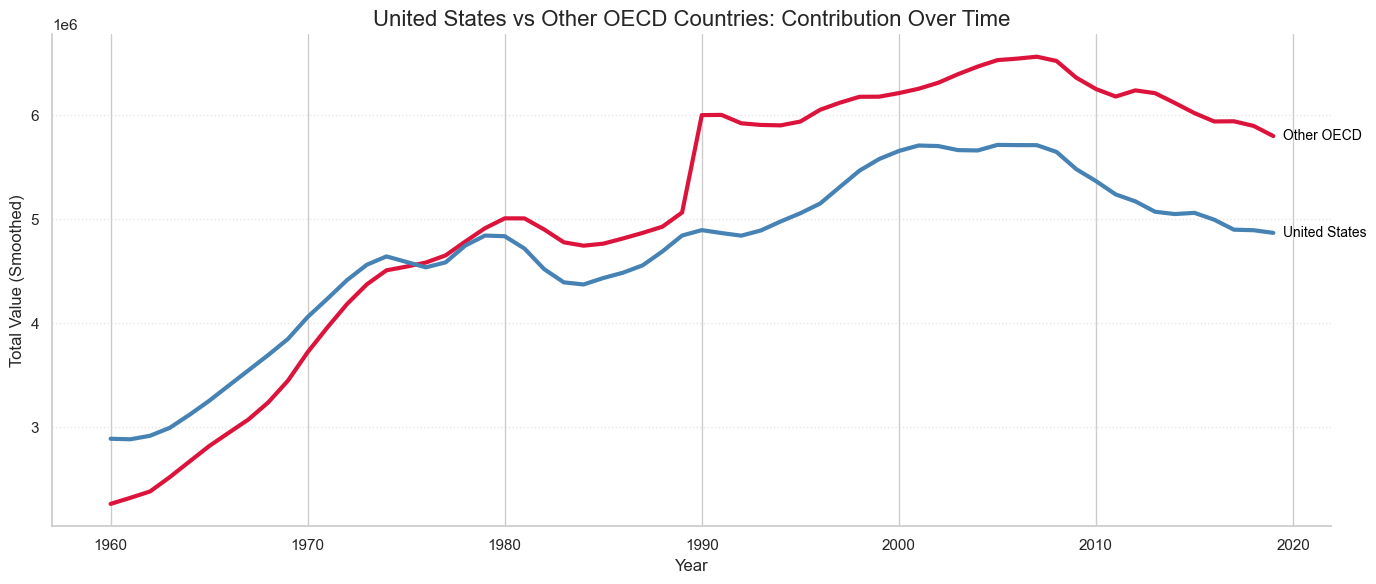

In [79]:
# Define OECD countries (cleaned for matching)
oecd = [
    'australia', 'austria', 'belgium', 'canada', 'chile', 'colombia', 'czech', 'denmark', 'estonia',
    'finland', 'france', 'germany', 'greece', 'hungary', 'iceland', 'ireland', 'israel', 'italy', 'japan',
    'korea', 'latvia', 'lithuania', 'luxembourg', 'mexico', 'netherlands', 'new zealand', 'norway',
    'poland', 'portugal', 'slovak', 'slovenia', 'spain', 'sweden', 'switzerland', 'turkey', 'united kingdom',
    'united states'
]

# Filter to OECD
df_oecd = df[df['clean_name'].isin(oecd)].copy()

# Smooth value (3-year rolling avg)
df_oecd['value_smoothed'] = df_oecd.groupby('country_name')['value'].transform(lambda x: x.rolling(3, min_periods=1).mean())

# Group as 'United States' vs 'Other OECD'
df_oecd['group'] = df_oecd['country_name'].apply(lambda x: 'United States' if x == 'United States' else 'Other OECD')

# Group and aggregate
df_grouped = df_oecd.groupby(['year', 'group'], as_index=False)['value_smoothed'].sum()

# Plot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_grouped, x='year', y='value_smoothed', hue='group', palette=['crimson', 'steelblue'], linewidth=3)

# Label end of each line
for group in df_grouped['group'].unique():
    last = df_grouped[df_grouped['group'] == group].iloc[-1]
    plt.text(last['year'] + 0.5, last['value_smoothed'], group, va='center', fontsize=10, color='black')

# Style
plt.title('United States vs Other OECD Countries: Contribution Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Value (Smoothed)')
plt.grid(axis='y', linestyle=':', alpha=0.5)
plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()
plt.show()


## United States vs. Collective OECD Emissions

This comparison highlights the outsized role of the United States within the OECD context:

- **Scale Disparity**: Despite being just one of 38 OECD member countries, the US has historically contributed emissions comparable to all other OECD nations combined, illustrating the disproportionate carbon footprint of the American economy.

- **Divergent Trends**: The visualization reveals a clear divergence in trends, with US emissions declining gradually since the mid-2000s while the collective emissions of other OECD countries have remained relatively stable.

- **Policy Implications**: This comparison raises important questions about responsibility and effort-sharing in climate mitigation. Although the US has shown emissions reductions, its per-capita contribution remains significantly higher than most other OECD members.

- **Relative Progress**: When viewed in proportion to economic output or population, the US reduction trend appears less dramatic, suggesting that deeper structural changes may be needed to align with global climate goals.

The stark contrast between these two lines emphasizes why US climate policy remains so central to global emissions discussions, even as its share of global emissions has declined relative to emerging economies like China and India.

# Conclusion: Global CO₂ Emissions Analysis Key Takeaways

This analysis of global carbon dioxide emissions by country reveals several critical insights that have profound implications for climate policy and international cooperation:

## 1. Shifting Global Emissions Landscape

Perhaps the most significant finding is the dramatic restructuring of global emissions responsibility over the past three decades. While developed economies like the United States and European nations dominated emissions in the early 1990s, the landscape has fundamentally changed with China's unprecedented industrial expansion. China's emissions have grown from roughly equivalent to the United States in the early 2000s to more than double US emissions in recent years.

This shift challenges traditional climate policy frameworks that were designed around developed nation leadership, highlighting the need for more inclusive approaches that meaningfully engage emerging economies while respecting development priorities.

## 2. Diverse Trajectories Among Similar Economies

Our analysis of OECD countries reveals that even among nations with similar economic development levels, emissions pathways vary significantly. This diversity suggests that economic development and emissions growth can be decoupled through policy choices, technological innovation, and structural economic changes.

The contrasting trends of emissions reduction in some developed economies versus growth in others provide valuable lessons about effective policy approaches. Understanding these differences can inform more targeted and effective climate action strategies tailored to different economic contexts.

## 3. The United States as a Critical Actor

Despite its declining share of global emissions, the United States remains disproportionately influential in global emissions patterns. Its emissions rival those of all other OECD countries combined, and its per-capita footprint remains among the highest globally. The gradual emissions decline in the US since the mid-2000s reflects partial progress but suggests that deeper structural changes are still needed.

As global climate negotiations continue, the US position—both in terms of domestic policy and international leadership—remains central to effective global mitigation efforts, even as attention increasingly shifts to rapidly growing economies like China and India.

These insights underscore the complex, evolving nature of the global emissions challenge and highlight the need for differentiated but collaborative approaches that account for historical responsibility, current emissions profiles, and future development needs across diverse economies.